# Creating Simulation Data for Binary Classification

<b>Note:</b> When you want to test your model, or provide some sample practice to your students,<br>
this can be very useful

#### This content includes
<ol>
    <li>How binary classification (Logistic regression) works</li>
    <li>How generate simulation data</li>
    <li>Test simulation data with sklearn logistic regerssion</li>
</ol>

## 1. How binary classification (Logistic regression) works
The picture below shows how binary classification Algorithm works.<br>

![figure1](./image/figure1.PNG)

Logit has a output(z) of linear probability. <br>
Easy example of logit is same as multivariabe linear regression model <br>
<b>Example)</b>  $z = \beta _0 + \beta_1\cdot x_1 + ... + \beta_n \cdot x_n$ <br>
This output theoratically has a range of (-inf, inf)<br>

In this example, I used only one input variable (x1).<br>
I generated beta0 (intercept) and beta1 (coefficient of x1) with random number between 0 and 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x1 = np.random.randn(1000) * 7
beta0 = np.random.randn(1)
beta1 = np.random.randn(1) 
print('beta0: {},\nbeta1: {}'.format(beta0, beta1))
z = beta0 + x1*beta1
plt.scatter(x1, z, s=1)
plt.xlabel('x1')
plt.ylabel('z')
plt.grid()
plt.show()

beta0: [0.55596268],
beta1: [0.89247389]


<Figure size 640x480 with 1 Axes>

Sigmoid transforms output of logit into (0, 1)<br>
<b>Sigmoid:</b><br>
$P(y=1) = \frac{1}{1+e^{-z}}$<br>
P is the probability of being positive(1) in binary classification

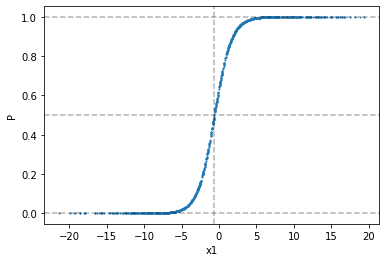

In [2]:
p = 1 / (1 + np.exp(-z))
plt.scatter(x1, p, s=1)
plt.axhline(0.5, color='black', linestyle='--', alpha=.3)
plt.axhline(0, color='black', linestyle='--', alpha=.3)
plt.axhline(1, color='black', linestyle='--', alpha=.3)
plt.axvline(-beta0/beta1, color='black', linestyle='--', alpha=0.3)
plt.xlabel('x1')
plt.ylabel('P')
plt.show()

If P is equal or bigger than 0.5  (if p >= 0.5)<br>
y prediction will be 1<br><br>
Or P is less than 0.5  (if p < 0.5)<br>
y prediction will be 0

In this example, 51.2% is predicted as 1

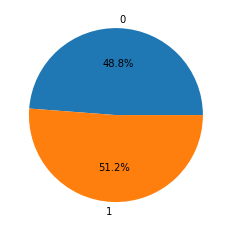

In [3]:
y_prediction = np.zeros(1000)
y_prediction[p>=0.5] = 1
y_prediction = np.array(y_prediction, dtype=int)
y_prediction.sum()/len(y_prediction)
pie = np.bincount(y_prediction)
plt.pie(pie, labels=np.arange(2), autopct='%1.1f%%')
plt.show()

## 2. How to generate simulation data

There are two most common method to generate y value for simulation.
<ol>
    <li>Create simulated y same method as how we predict the y. <b>(Wrong way)</b></li>
    If $p >= 0.5$, put 1, else, put 0
    <li>Generate uniformed random number (r) between 0 and 1, and compare to p. <b>(Right way)</b></li>
    If $r < p$, put 1, else, put 0
</ol>

In [4]:
from sklearn.linear_model import LogisticRegression

x1 = x1.reshape(-1,1)
y_wrong_way = np.zeros(1000)
y_wrong_way[p>=0.5] = 1

model = LogisticRegression()
model.fit(x1, y_wrong_way)
y_hat = model.predict(x1)

/home/study/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
model.intercept_, model.coef_

(array([2.40545658]), array([[4.20435562]]))

In [6]:
beta0, beta1

(array([0.55596268]), array([0.89247389]))

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_hat, y_wrong_way)
confusion_matrix(y_hat, y_wrong_way)

array([[488,   1],
       [  0, 511]])

With the y simulated in wrong way (first method),<br>
accuracy of the logistic regression model is 99.9%.

However, model predicted wrong intercept and coefficient.<br>
Predicted intercept & coefficient : (2.40545658, 4.20435562) <br>
Generated intercept & coefficient : (0.55596268, 0.89247389)

This means the model is overfitted.

#### In the second method,

P is probability of being 1<br>
It is same as probability of <br>
<b>"Uniformly distributed random number [0,1) is placed between 0 ~ P"</b>

In [8]:
r = np.random.rand(1000)
y_right_way = np.zeros(1000)
y_right_way[r<p] = 1
y_right_way.sum()/len(y_right_way)

0.508

In [9]:
model2 = LogisticRegression()
model2.fit(x1, y_right_way)
y_hat2 = model2.predict(x1)

/home/study/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
model2.intercept_, model2.coef_

(array([0.51700508]), array([[0.95608321]]))

In [11]:
accuracy_score(y_hat2, y_right_way)

0.924

With the y simulated in right way (second method),<br>
accuracy of the logistic regression model is relatively lower than first method. (92.4%)

However, model predicted intercept and coefficient way better.<br>
Predicted intercept & coefficient : (0.51700508, 0.95608321)<br>
Generated intercept & coefficient : (0.55596268, 0.89247389)